<a href="https://colab.research.google.com/github/JohnMaleek/ML/blob/main/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exercise 1
Visualize the color histogram of an image (from the CIFAR-10 or an image with higher resulotion). (1p)



*!! THIS SOLUTION WITH HSV NOT RGB !!*

Enter the index of the image please: 231


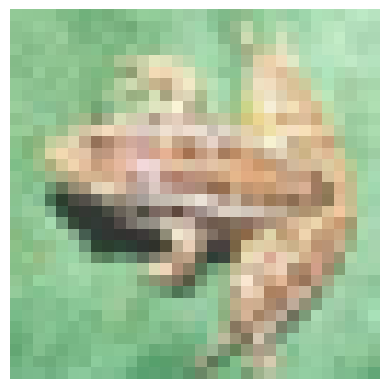

Image label: frog (6)


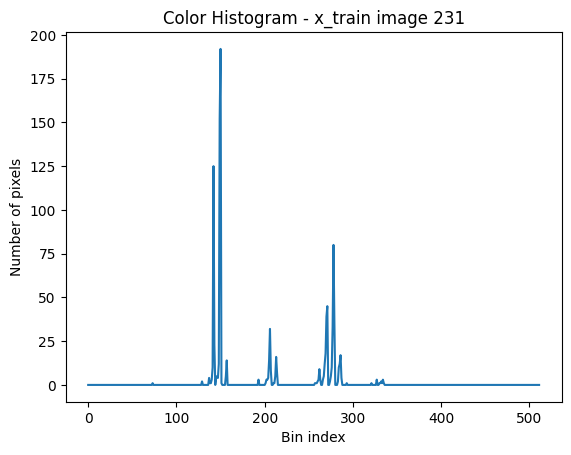

In [20]:


# import the necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import random
import tensorflow as tf
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

#***Using the same way that was mentioned in lecture's google coolab***#

def color_histogram(image, bins=(8, 8, 8)):
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        # extract a 3D color histogram, parameters: (images, channels, mask, histSize, ranges[])


    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins, [0, 180, 0, 256, 0, 256])

   #cv2.normalize(hist, hist)
    return hist.flatten()


(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
y_train = y_train.ravel()
y_test = y_test.ravel()
#Let the user enter whatever the number of image he wants
#instead of making static number of image
indx = int(input("Enter the index of the image please: "))
#this class include every labels that found in dataset in ciphar dataset
# I put this line in the code as optional to make it easy detect
# which label image belong
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# -------------------------
plt.imshow(x_train[indx])
plt.axis("off")
plt.show()
print("Image label: {} ({})".format(class_names[y_train[indx]], y_train[indx]))
# -------------------------

hist_train = color_histogram(x_train[indx])


# -------- Diagram 1: x_train --------
plt.figure()
plt.plot(hist_train)
plt.title("Color Histogram - x_train image {}".format(indx))
plt.xlabel("Bin index")
plt.ylabel("Number of pixels")
plt.show()



*ANOTHER SOLUTION -- RGB*

Enter the number of image 657


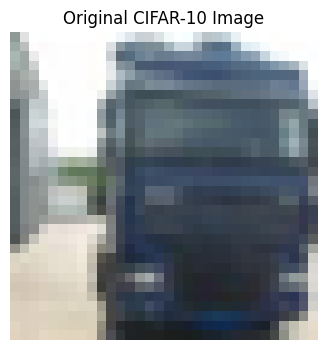

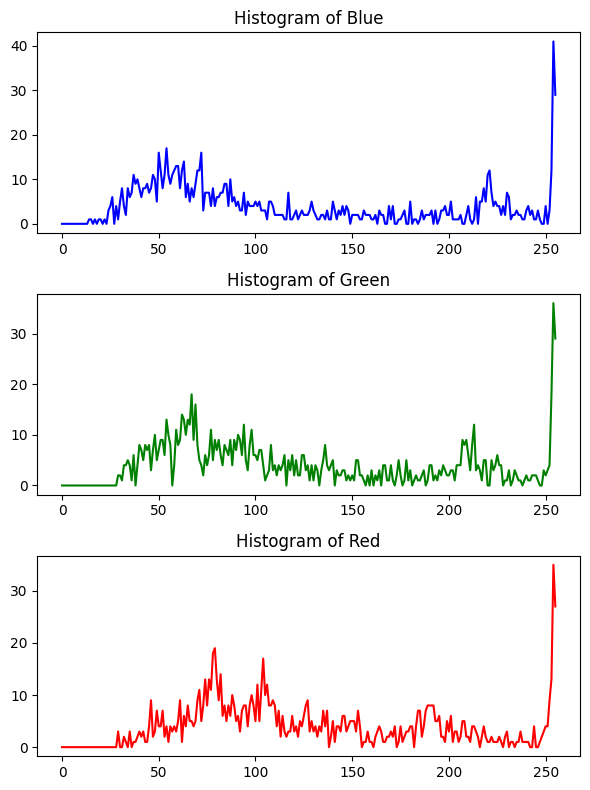

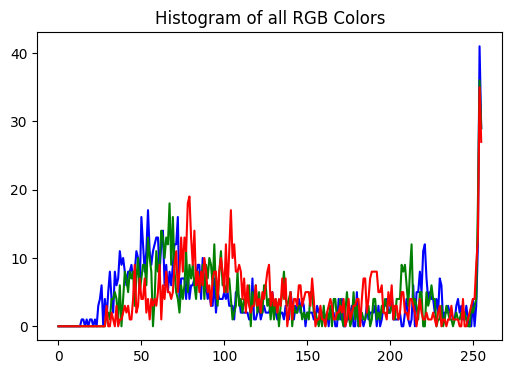

In [35]:
# import necessary packages
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
import random
import tensorflow as tf
import numpy as np
import cv2
import time
import matplotlib.pyplot as plt

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

indx = int(input("Enter the number of image "))
image = x_train[indx]

# Show original image
plt.figure(figsize=(4,4))
plt.axis("off")
plt.title("Original CIFAR-10 Image")
plt.imshow(image)  # CIFAR-10 images already RGB
plt.show()

# Get RGB data from image
# cv2.calcHist = distribution of color pixels
blue = cv2.calcHist([image], [0], None, [256], [0, 256])
green = cv2.calcHist([image], [1], None, [256], [0, 256])
red = cv2.calcHist([image], [2], None, [256], [0, 256])

# Separate Histograms for each color
plt.figure(figsize=(6,8))

plt.subplot(3, 1, 1)
plt.title("Histogram of Blue")
plt.plot(blue, color="blue")

plt.subplot(3, 1, 2)
plt.title("Histogram of Green")
plt.plot(green, color="green")

plt.subplot(3, 1, 3)
plt.title("Histogram of Red")
plt.plot(red, color="red")

plt.tight_layout()
plt.show()

# Combined histogram
# color="x" ,, x is parameter that has ability to mark the line with whatever color i want
plt.figure(figsize=(6,4))
plt.title("Histogram of all RGB Colors")
plt.plot(blue, color="blue")
plt.plot(green, color="green")
plt.plot(red, color="red")
plt.show()

### Exercise 2
Try to implement your own kNN classifier. It needs to be a class with 4 methods where the `fit()` method stores the training set while in the `predict()` method the program will find the k-nearest neighbors to all samples in the test set according to the predefined distance metric. The `score()` method needs to return with the accuracy of the model on the test set specified in the arguments. (2p)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
import random
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
########IMPORTANT NOTES#########
#in this model i'll use cifar samples however there's another sample could be more fast like IRIS dataset
class newKNN:

    #Constructor
    # I just wrote this method just to be execution whenever i write model = newKNN(k=3)
    #model = newKNN(k=3)


    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric


    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)


    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        #get through each test samples in the loop
        for x in X_test:
            distances = []
            #in this loop will caluclate the distance between the image we used in test and every image in training
            for x_train in self.X_train:
                if self.distance_metric == 'euclidean':
                    dist = np.sqrt(np.sum((x - x_train) ** 2)) ##--->> rule of Euclidean ##
                elif self.distance_metric == 'manhattan':
                    dist = np.sum(np.abs(x - x_train)) ##---->> rule of Manhattan ##
                else:
                    raise ValueError("Invalid distance metric")  #incase if it didnt go well and couldn't calculate the distance

                distances.append(dist) #add all calculated distances

            #try to get nearest k
            #putting argsort just to sorting them in a good shape
            k_indices = np.argsort(distances)[:self.k]

            k_labels = self.y_train[k_indices]

            #in order to get to know how many labels appear && and try to choose the most repeated one
            values, counts = np.unique(k_labels, return_counts=True)
            majority_label = values[np.argmax(counts)]



            #adding all predicitons together
            predictions.append(majority_label)

        return np.array(predictions)

    # Last method
    #in last method we calculate the number of predicitions over number of samples
    #for example if 300 sample is true out of 1000 so the accuracy supposed to be =0.3
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)



#putting important lines that will load cifar dataset
#i'll use some not all of them in order to increase the model's performance

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()
# Flatten
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0



X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

#smaller subset
X_train_small = X_train[:5000]
Y_train_small = Y_train[:5000]
X_test_small = X_test[:1000]
Y_test_small = Y_test[:1000]



print("[INFO] Training newKNN...")
start = time.time()
model = newKNN(k=3, distance_metric='euclidean')


#begin of storing data
model.fit(X_train_small, Y_train_small)

print("[INFO] Training done in {:.2f} sec".format(time.time() - start))

print("[INFO] Evaluating...")
start = time.time()
accuracy = model.score(X_test_small, Y_test_small)
print("[INFO] Accuracy: {:.2f}%".format(accuracy * 100))
print("[INFO] Testing time: {:.2f} sec".format(time.time() - start))

[INFO] Training newKNN...
[INFO] Training done in 0.05 sec
[INFO] Evaluating...
[INFO] Accuracy: 24.70%
[INFO] Testing time: 67.99 sec


### Exercise 3
Add at least 2 other distance metrices to the kNN class and try out their efficiency. (1p)

In [13]:
from sklearn.neighbors import KNeighborsClassifier
import random
import cv2
import time
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.utils import shuffle
########IMPORTANT NOTES#########
#in this model i'll use cifar samples however there's another sample could be more fast like IRIS dataset
class newKNN:

    #Constructor
    # I just wrote this method just to be execution whenever i write model = newKNN(k=3)
    #model = newKNN(k=3)

    def __init__(self, k=3, distance_metric='euclidean'):
        self.k = k
        self.distance_metric = distance_metric


    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)


    def predict(self, X_test):
        X_test = np.array(X_test)
        predictions = []
        #get through each test samples in the loop
        for x in X_test:
            distances = []
            #in this loop will caluclate the distance between the image we used in test and every image in training
            for x_train in self.X_train:
                if self.distance_metric == 'euclidean':
                    dist = np.sqrt(np.sum((x - x_train) ** 2)) ##--->> rule of Euclidean ##
                elif self.distance_metric == 'manhattan':
                    dist = np.sum(np.abs(x - x_train)) ##---->> rule of Manhattan ##
                elif self.distance_metric == 'minkowski':
                    p = 3
                    dist = np.power(np.sum(np.abs(x - x_train) ** p), 1/p)  ##---->> rule of Minkowski ##
                elif self.distance_metric == 'cosine':
                    dot = np.dot(x, x_train)
                    norm_x = np.linalg.norm(x)
                    norm_train = np.linalg.norm(x_train)
                    dist = 1 - (dot / (norm_x * norm_train + 1e-10))  ##---->> rule of Cosine ##
                else:
                    raise ValueError("Invalid distance metric")  #incase if it didnt go well and couldn't calculate the distance

                distances.append(dist) #add all calculated distances

            #try to get nearest k
            #putting argsort just to sorting them in a good shape
            k_indices = np.argsort(distances)[:self.k]

            k_labels = self.y_train[k_indices]

            #in order to get to know how many labels appear && and try to choose the most repeated one
            values, counts = np.unique(k_labels, return_counts=True)
            majority_label = values[np.argmax(counts)]

            #adding all predicitons together
            predictions.append(majority_label)

        return np.array(predictions)

    # Last method
    #in last method we calculate the number of predicitions over number of samples
    #for example if 300 sample is true out of 1000 so the accuracy supposed to be =0.3
    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return np.mean(y_pred == y_test)



#putting important lines that will load cifar dataset
#i'll use some not all of them in order to increase the model's performance

(X_train, Y_train), (X_test, Y_test) = tf.keras.datasets.cifar10.load_data()

Y_train = Y_train.ravel()
Y_test = Y_test.ravel()

# Flatten
X_train = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test = X_test.reshape(X_test.shape[0], -1) / 255.0

X_train, Y_train = shuffle(X_train, Y_train, random_state=42)

#smaller subset
X_train_small = X_train[:5000]
Y_train_small = Y_train[:5000]
X_test_small = X_test[:1000]
Y_test_small = Y_test[:1000]


# =========================
# Testing different metrics
# =========================

metrics = ['euclidean', 'manhattan', 'minkowski', 'cosine']

for metric in metrics:

    print(f"\n[INFO] Training newKNN using {metric} distance...")
    start = time.time()

    model = newKNN(k=3, distance_metric=metric)

    #begin of storing data
    model.fit(X_train_small, Y_train_small)

    print("[INFO] Training done in {:.2f} sec".format(time.time() - start))

    print("[INFO] Evaluating...")
    start = time.time()

    accuracy = model.score(X_test_small, Y_test_small)

    print("[INFO] Accuracy: {:.2f}%".format(accuracy * 100))
    print("[INFO] Testing time: {:.2f} sec".format(time.time() - start))


[INFO] Training newKNN using euclidean distance...
[INFO] Training done in 0.05 sec
[INFO] Evaluating...
[INFO] Accuracy: 24.70%
[INFO] Testing time: 71.18 sec

[INFO] Training newKNN using manhattan distance...
[INFO] Training done in 0.05 sec
[INFO] Evaluating...
[INFO] Accuracy: 28.20%
[INFO] Testing time: 58.92 sec

[INFO] Training newKNN using minkowski distance...
[INFO] Training done in 0.05 sec
[INFO] Evaluating...
[INFO] Accuracy: 21.70%
[INFO] Testing time: 508.54 sec

[INFO] Training newKNN using cosine distance...
[INFO] Training done in 0.06 sec
[INFO] Evaluating...
[INFO] Accuracy: 26.80%
[INFO] Testing time: 61.86 sec
